In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("C:/Users/User/Downloads/Compressed/Churn_Modelling.csv")

In [39]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# removing unnecessary xollumn
X = df.iloc[:,3:-1]

In [41]:
y = df.iloc[:,-1]

EDA

In [14]:
df1 = df.copy()

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


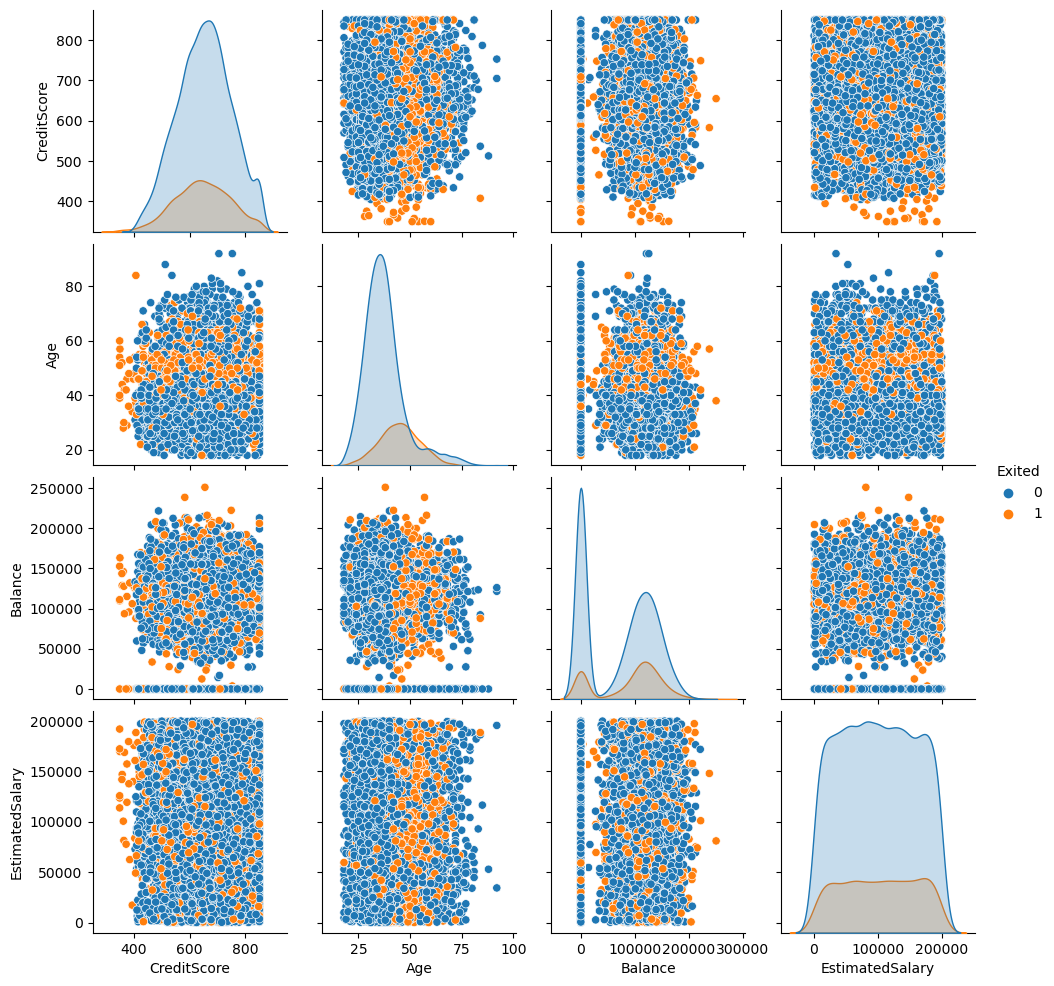

In [15]:
d1 = df1[['CreditScore','Age','Balance','EstimatedSalary','Exited']]

sns.pairplot(d1 , hue = 'Exited')

<Axes: xlabel='Gender'>

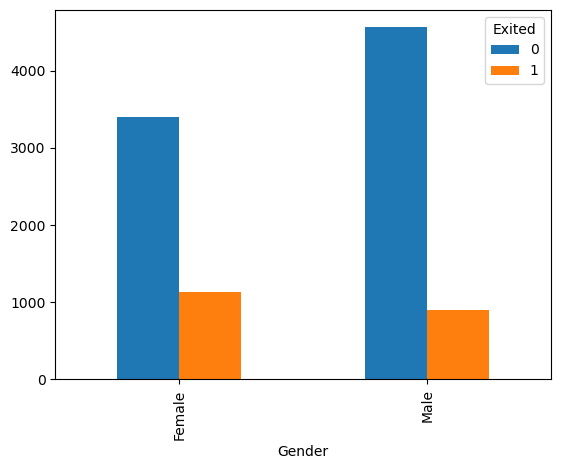

In [16]:
df1.groupby('Gender')['Exited'].value_counts().unstack().plot.bar()

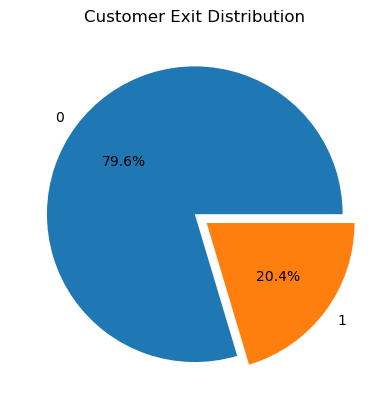

In [17]:
exit_count = df1['Exited'].value_counts()

plt.pie(exit_count, autopct = "%1.1f%%",explode=[0,0.1],labels = exit_count.index)
plt.title("Customer Exit Distribution")
plt.show()

In [18]:
geo_exit = df1.groupby('Geography')['Exited'].value_counts().unstack()
geo_exit

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Geography'>

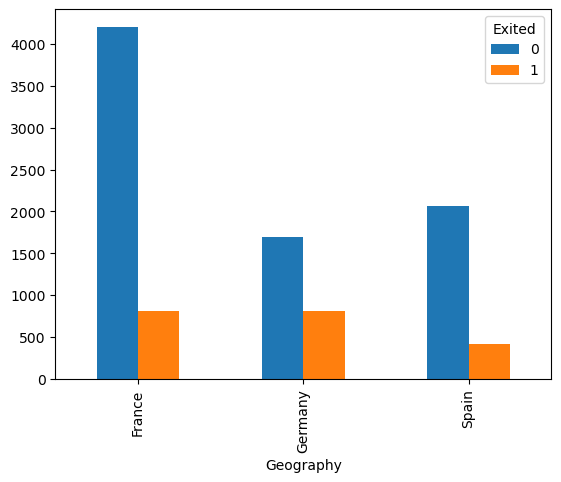

In [19]:
geo_exit.plot.bar()

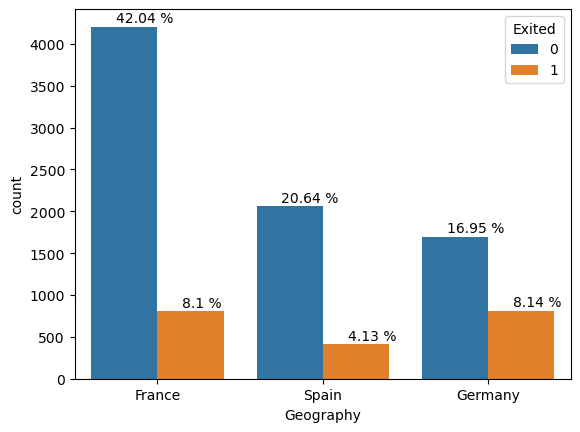

In [20]:
ax = sns.countplot(x = 'Geography' , data = df1 , hue = 'Exited')
for value in ax.patches:
    percentage = ((value.get_height()/len(df))*100)
    x = value.get_x() + value.get_width()/2 - 0.05
    y = value.get_y() + value.get_height() + 50
    ax.annotate(f"{round(percentage,2)} %" , (x,y))
    
plt.show()

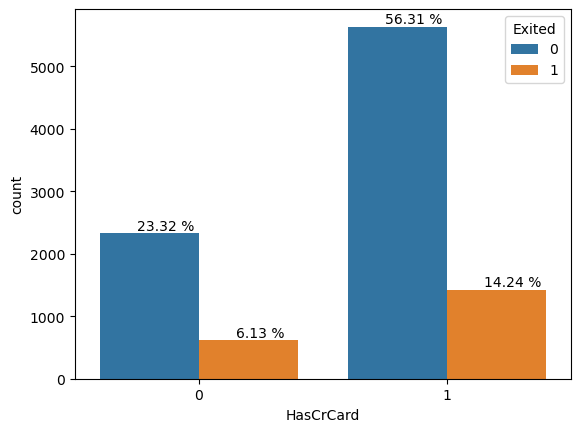

In [21]:
#Custmer churn by HasCard

ax = sns.countplot(x = 'HasCrCard' , data = df1 , hue = 'Exited')
for value in ax.patches:
    percentage = ((value.get_height()/len(df))*100)
    x = value.get_x() + value.get_width()/2 - 0.05
    y = value.get_y() + value.get_height() + 50
    ax.annotate(f"{percentage} %" , (x,y))
    
plt.show()

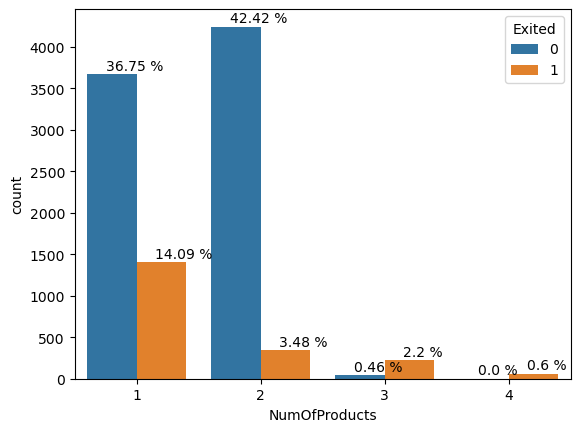

In [22]:
ax = sns.countplot(x = 'NumOfProducts' , data = df1 , hue = 'Exited')
for value in ax.patches:
    percentage = ((value.get_height()/len(df))*100)
    x = value.get_x() + value.get_width()/2 - 0.05
    y = value.get_y() + value.get_height() + 50
    ax.annotate(f"{round(percentage,2)} %" , (x,y))
    
plt.show()

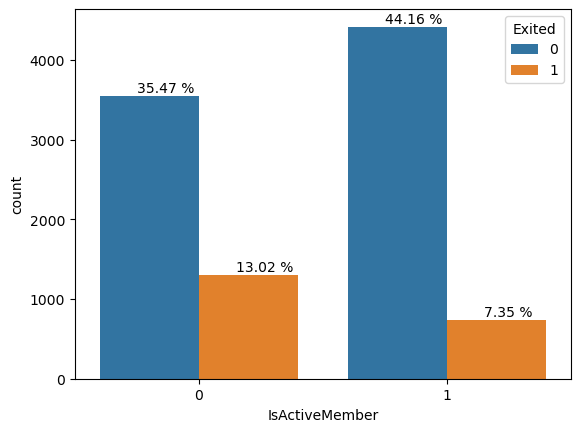

In [23]:
ax = sns.countplot(x = 'IsActiveMember' , data = df1 , hue = 'Exited')
for value in ax.patches:
    percentage = ((value.get_height()/len(df))*100)
    x = value.get_x() + value.get_width()/2 - 0.05
    y = value.get_y() + value.get_height() + 50
    ax.annotate(f"{round(percentage,2)} %" , (x,y))
    
plt.show()

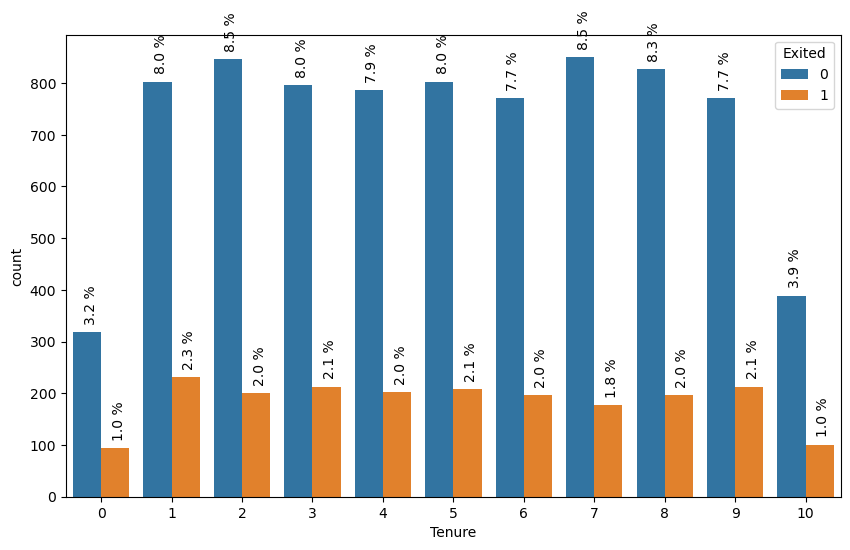

In [24]:
#Custmer churn by IsActivemember

plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Tenure' , data = df1 , hue = 'Exited')
for value in ax.patches:
    percentage = ((value.get_height()/len(df))*100)
    x = value.get_x() + value.get_width()/2 - 0.05
    y = value.get_y() + value.get_height() + 20
    ax.annotate(f"{round(percentage,1)} %" , (x,y) , rotation=90)
    
plt.show()

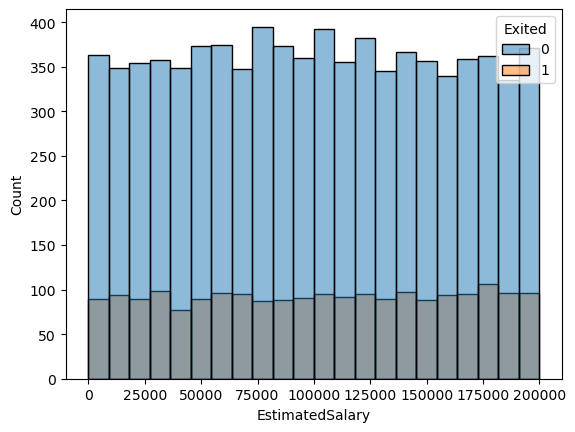

In [25]:
#Salary & Exit
sns.histplot(x='EstimatedSalary' , data = df1 , hue = 'Exited')
plt.show()

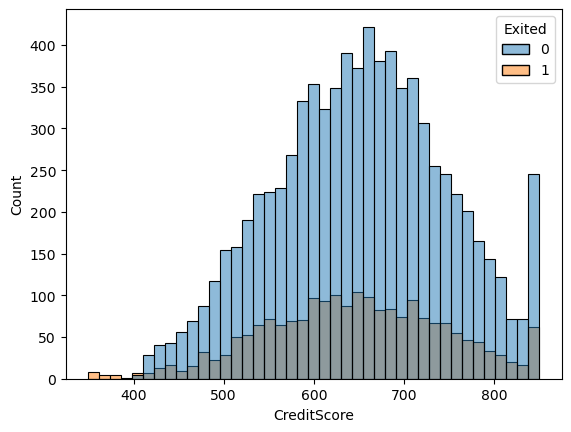

In [26]:
sns.histplot(x='CreditScore' , data = df1 , hue = 'Exited')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12224\2087674657.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


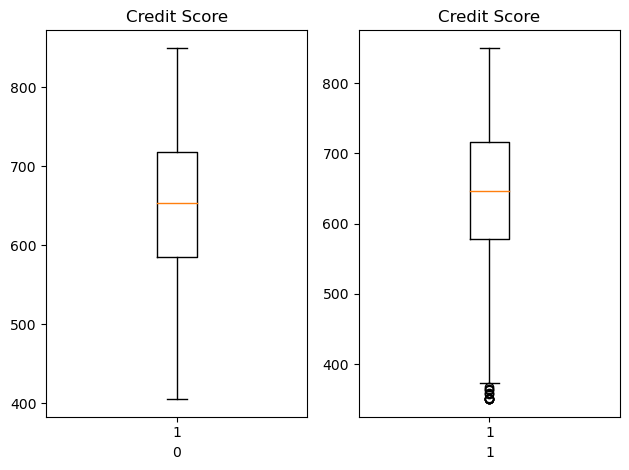

In [27]:
for idx,group in df1.groupby('Exited')['CreditScore']:
    #print(sns.boxplot(group['CreditScore']))
    plt.subplot(1,2,idx+1)
    plt.title("Credit Score")
    plt.boxplot(group)
    plt.xlabel(idx)
    plt.tight_layout()
plt.show()

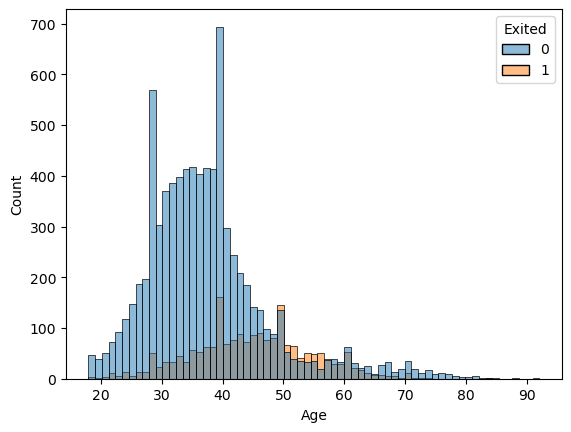

In [28]:
sns.histplot(x='Age' , data = df1 , hue = 'Exited')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12224\2790094117.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


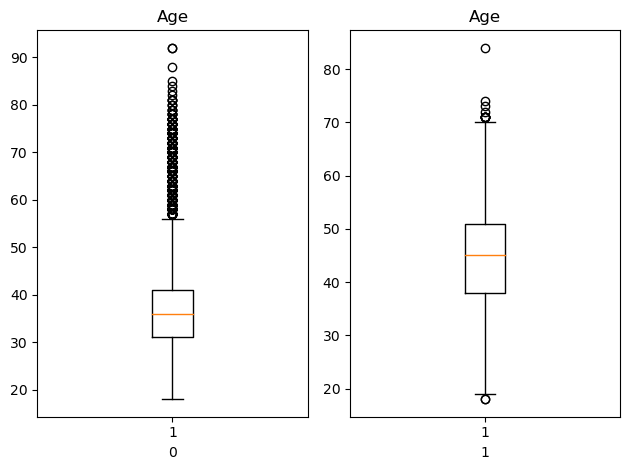

In [29]:
for idx,group in df1.groupby('Exited')['Age']:
    #print(sns.boxplot(group['CreditScore']))
    plt.subplot(1,2,idx+1)
    plt.title("Age")
    plt.boxplot(group)
    plt.xlabel(idx)
    plt.tight_layout()
plt.show()

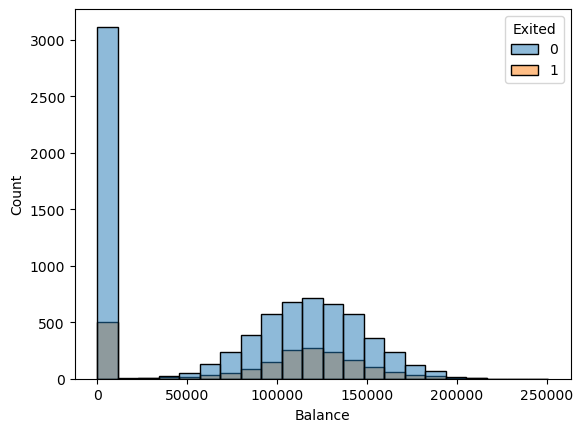

In [30]:
sns.histplot(x='Balance' , data = df1 , hue = 'Exited')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12224\637003397.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


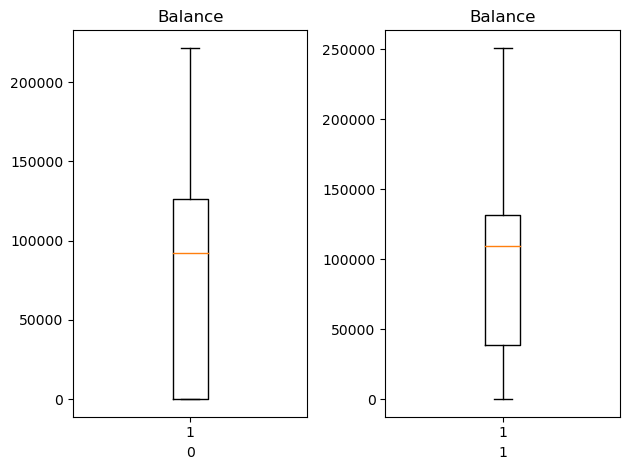

In [31]:
for idx,group in df1.groupby('Exited')['Balance']:
    #print(sns.boxplot(group['CreditScore']))
    plt.subplot(1,2,idx+1)
    plt.title("Balance")
    plt.boxplot(group)
    plt.xlabel(idx)
    plt.tight_layout()
plt.show()

In [42]:
#one hot encoding
geo = pd.get_dummies(X["Geography"], dtype = int, drop_first = True)

In [43]:
gen = pd.get_dummies(X["Gender"], dtype = int, drop_first = True)

In [44]:
X = X.drop(['Gender','Geography'], axis = 1)

In [45]:
#concotanation
X = pd.concat([X,geo,gen], axis = 1)

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

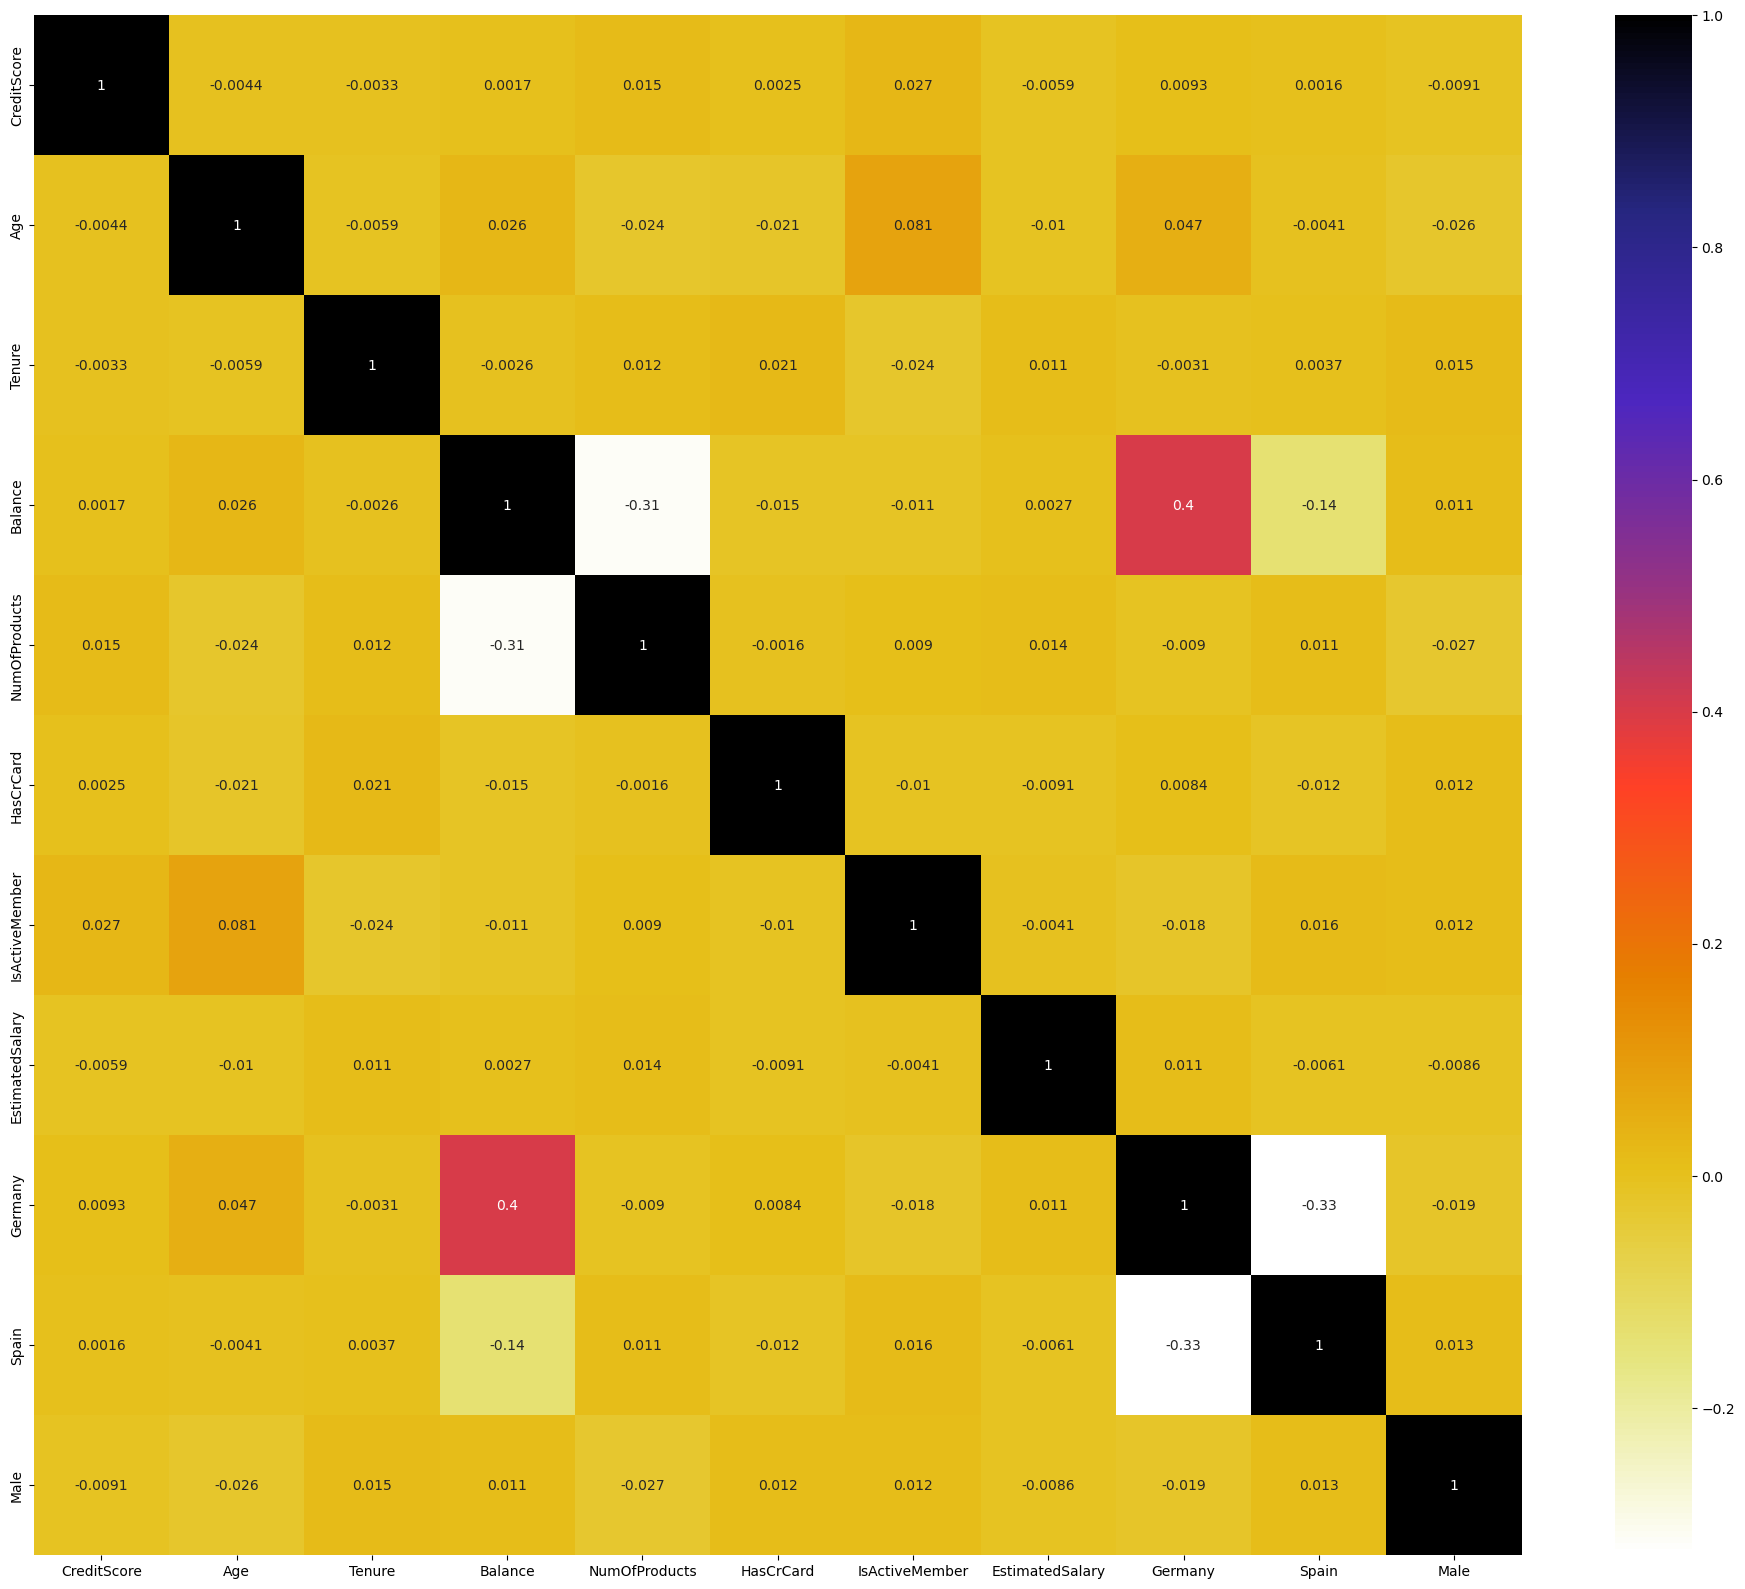

In [47]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [48]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [49]:
# feature scalling(making data ani array)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5)
# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)
print("\nCross-Validation Scores:", cv_scores)

Accuracy: 0.8675

Confusion Matrix:
 [[1525   70]
 [ 195  210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000


Cross-Validation Scores: [0.8635 0.8705 0.859  0.8655 0.861 ]


In [53]:
import xgboost as xgb   
# Create an XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate (controls step size during training)
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Cross-validation for more robust evaluation (optional)
cv_scores = cross_val_score(model, X, y, cv=5)
# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)
print("\nCross-Validation Scores:", cv_scores)

Accuracy: 0.8655

Confusion Matrix:
 [[1524   71]
 [ 198  207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.74      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Cross-Validation Scores: [0.863  0.8705 0.858  0.872  0.855 ]


In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8325

Confusion Matrix:
 [[1497   98]
 [ 237  168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1595
           1       0.63      0.41      0.50       405

    accuracy                           0.83      2000
   macro avg       0.75      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.798

Confusion Matrix:
 [[1368  227]
 [ 177  228]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      1595
           1       0.50      0.56      0.53       405

    accuracy                           0.80      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg       0.81      0.80      0.80      2000



In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.828

Confusion Matrix:
 [[1512   83]
 [ 261  144]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1595
           1       0.63      0.36      0.46       405

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [58]:
# Initialising the ANN
classifier = Sequential()

In [59]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [60]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [61]:
classifier.add(Dense(units=7,activation='relu'))

In [62]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [63]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
   
)

In [65]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100, callbacks = early_stop)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 3.1431 - accuracy: 0.7962 - val_loss: 3.1539 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 3.1431 - accuracy: 0.7962 - val_loss: 3.1539 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 3.1431 - accuracy: 0.7962 - val_loss: 3.1539 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 3.1431 - accuracy: 0.7962 - val_loss: 3.1539 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 3.1431 - accuracy: 0.7962 - val_loss: 3.1539 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 3.1431 - accuracy: 0.7962 - val_loss: 3.1539 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 3.1431 - accuracy: 0.7962 - val_loss: 3.1539 - val_accuracy: 0.7955

In [66]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

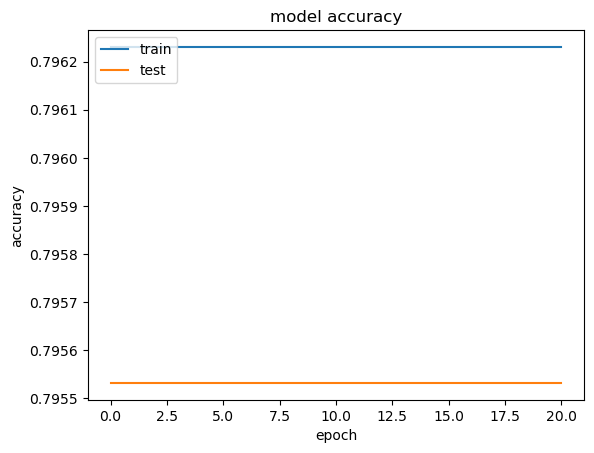

In [67]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

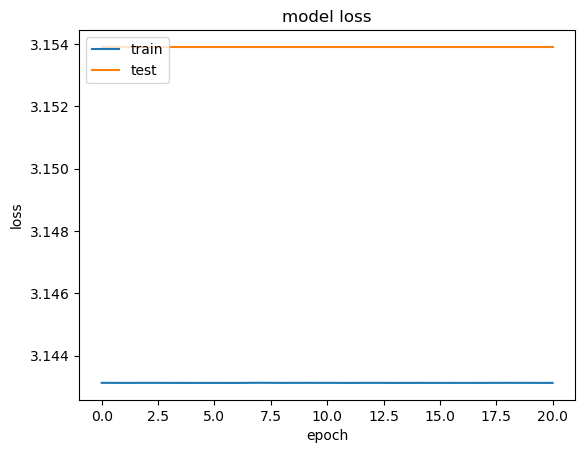

In [68]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 645us/step


In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [71]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [72]:
score

0.7975

In [73]:
classifier.get_weights()

[array([[ 0.32535696,  0.18817711,  0.15402204, -0.05601919,  0.42814845,
          0.31580925,  0.02573746,  0.00211817,  0.18711543, -0.00134432,
          0.06750673],
        [-0.24427226,  0.06145543,  0.07977682, -0.06710693, -0.45941067,
          0.10297042,  0.13985664, -0.05755091,  0.5193669 , -0.2899383 ,
          0.04604942],
        [ 0.00792181,  0.09278548, -0.12576982,  0.1978122 ,  0.09377897,
          0.3782581 ,  0.49987715,  0.12117058, -0.43084955,  0.14408165,
         -0.49463207],
        [ 0.30492324,  0.25327945,  0.4264775 ,  0.22263813,  0.31175756,
         -0.20918122, -0.18273392, -0.31648433,  0.19662213, -0.27226573,
          0.02381343],
        [ 0.13582575, -0.22439024, -0.10298425,  0.40732473,  0.15967816,
          0.44518375, -0.19923013,  0.2501642 , -0.24764699, -0.40087116,
         -0.20710665],
        [ 0.43571526, -0.26408044, -0.3178262 , -0.17431518,  0.20357442,
          0.47822732,  0.44600254,  0.42603552,  0.49260288, -0.1159220

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Create an SVC model with a linear kernel and C=1.0
model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Cross-validation for more robust evaluation (optional)
cv_scores = cross_val_score(model, X, y, cv=5)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)
print("\nCross-Validation Scores:", cv_scores)


C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7975

Confusion Matrix:
 [[1595    0]
 [ 405    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000


Cross-Validation Scores: [0.7835 0.7765 0.786  0.7815 0.7795]
